In [2]:
import pysam
import editdistance
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# read the mosaics to a dictionary
def get_genes_from_file(filepath):
    header_to_seq = {}
    with pysam.FastxFile(filepath) as fin:
        for fasta_entry in fin:
            header_to_seq[fasta_entry.name] = fasta_entry.sequence
    return header_to_seq
    
genes_to_seq_100x_no_denovo = get_genes_from_file("/home/leandro/git/pandora1_paper/cluster/data/hps/nobackup/research/zi/projects/pandora_paper/analysis/100x/filter/compare_no_denovo/pandora_multisample.vcf_ref.fa")
genes_to_seq_100x_with_denovo = get_genes_from_file("/home/leandro/git/pandora1_paper/cluster/data/hps/nobackup/research/zi/projects/pandora_paper/analysis/100x/filter/compare_with_denovo/pandora_multisample.vcf_ref.fa")


In [4]:
# compute the proportion of edit distance of each gene
proportion_edit_distances = {}
for gene_in_no_denovo, seq_in_no_denovo in genes_to_seq_100x_no_denovo.items():
    if gene_in_no_denovo in genes_to_seq_100x_with_denovo:
        seq_in_with_denovo = genes_to_seq_100x_with_denovo[gene_in_no_denovo]
        edit_distance_between_genes = editdistance.eval(seq_in_no_denovo, seq_in_with_denovo)
        largest_length = max(len(seq_in_with_denovo), len(seq_in_no_denovo))
        proportion_edit_distances[gene_in_no_denovo] = edit_distance_between_genes / largest_length
        

In [5]:
# compute the edit distances of each gene
edit_distances = {}
for gene_in_no_denovo, seq_in_no_denovo in genes_to_seq_100x_no_denovo.items():
    if gene_in_no_denovo in genes_to_seq_100x_with_denovo:
        seq_in_with_denovo = genes_to_seq_100x_with_denovo[gene_in_no_denovo]
        edit_distance_between_genes = editdistance.eval(seq_in_no_denovo, seq_in_with_denovo)
        edit_distances[gene_in_no_denovo] = edit_distance_between_genes


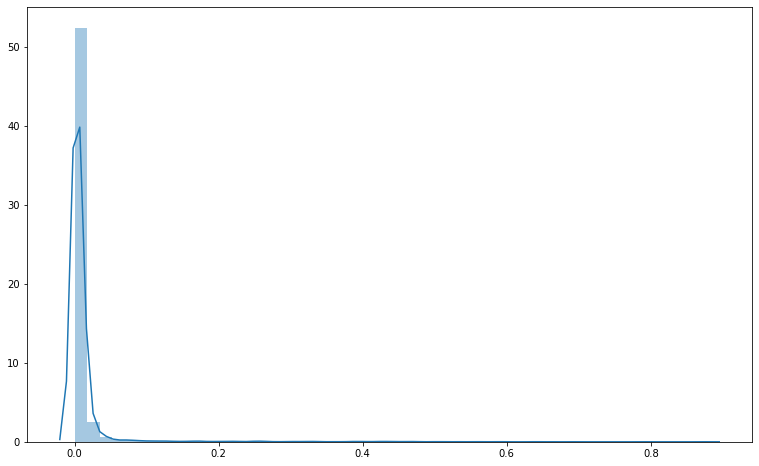

In [6]:
# plot distribution of proportion_edit_distances
fig, ax = plt.subplots(figsize=(13,8))
sns.distplot(list(proportion_edit_distances.values()), ax=ax)


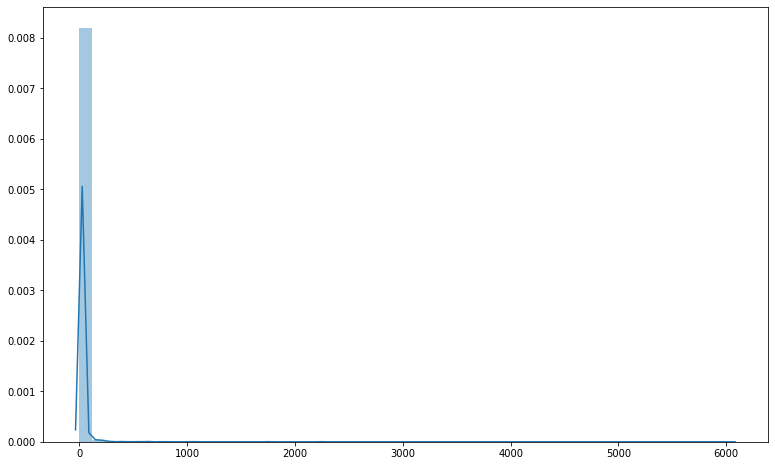

In [7]:
#plot distribution of edit distances
fig, ax = plt.subplots(figsize=(13,8))
sns.distplot(list(edit_distances.values()), ax=ax)


In [8]:
#print the genes with highest EDs
for gene, ed in proportion_edit_distances.items():
    if ed >= 0.5:
        print(gene, ed)



GC00003661_2 0.6374219193639977
Cluster_358 0.531322505800464
GC00003107 0.5129533678756477
GC00000579_3 0.504424778761062
GC00003372_r1_1 0.6934306569343066
GC00000142_15_p2 0.7920792079207921
GC00005259 0.5816326530612245
Cluster_902 0.6439628482972136
GC00000621_2 0.5979020979020979
GC00003300_r1_r1_r1_1 0.6642496154691276
Cluster_51 0.5365853658536586
GC00002972 0.515850144092219
GC00003435_3 0.5522875816993464
GC00003285_4 0.56
GC00000487_1 0.8745098039215686
GC00008479 0.5659340659340659
GC00002417 0.591816367265469


We check what is the edit distance if the 5 genes with highest delta scor


In [10]:
# get the ED of the genes with the highest delta score
def print_ED_for_a_gene(gene):
    print(f"Gene: {gene}, ED = {edit_distances[gene]}, Prop ED = {proportion_edit_distances[gene]}")

print_ED_for_a_gene("GC00000191_6")
print_ED_for_a_gene("GC00000558_1")
print_ED_for_a_gene("GC00003150")
print_ED_for_a_gene("GC00000027_7")
print_ED_for_a_gene("GC00003295_10")


Gene: GC00000191_6, ED = 141, Prop ED = 0.037183544303797465
Gene: GC00000558_1, ED = 80, Prop ED = 0.032089851584436425
Gene: GC00003150, ED = 47, Prop ED = 0.031522468142186455
Gene: GC00000027_7, ED = 82, Prop ED = 0.019303201506591337
Gene: GC00003295_10, ED = 1657, Prop ED = 0.3118765292678336
